In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from uncertainties import unumpy as unp
import uncertainties
import seaborn as sb

In [24]:
raw_data = pd.read_excel('data/raw_data.xlsx')
raw_data = raw_data[~raw_data.units.str.contains('trap')]

### 1) Remove non-mass measurements

In [ ]:
dry = lambda x: 10**(-7.761+0.34975*x-3.9315e-3*x**2)
wet = lambda x: 10**(-6.972+0.3687*x-4.1725e-3*x**2)

size = np.linspace(2.4,60)
(dry(size)/wet(size))

In [25]:
pop_data = raw_data[raw_data.units == 'individuals/m^2']

In [3]:
# mass_data = raw_data[raw_data.units=='mg/m^2 (dry weight)']

In [26]:
metadata = pd.read_csv('data/groups_per_reference.csv')
pop_data_with_meta = pop_data.merge(metadata,left_on='reference', right_on='Paper',how='left')

In [27]:
valid_data = pop_data_with_meta.copy()
valid_data = valid_data[~valid_data['Standard groups'].isna()]
valid_data = valid_data[(valid_data['Standard groups']!='Microarthropods') | ((valid_data['Standard groups']=='Microarthropods') & (valid_data['sub-class'].isin(['Acari','Collembola'])))]

In [28]:
valid_data.loc[valid_data['sub-class']=='Acari','aggregated taxon'] = 'Acari'
valid_data.loc[valid_data['sub-class']=='Collembola','aggregated taxon'] = 'Collembola'
valid_data.loc[valid_data['super-family']=='Isoptera','aggregated taxon'] = 'Isoptera'
valid_data.loc[valid_data['family']=='Formicidae','aggregated taxon'] = 'Formicidae'
valid_data.loc[valid_data['aggregated taxon'].isna(),'aggregated taxon'] = 'Other'

In [29]:
soil_data = valid_data[valid_data['aggregated environment'] =='soil/litter']
canopy_data = valid_data[valid_data['aggregated environment'] =='plants']
surface_data = valid_data[valid_data['aggregated environment'] =='above ground']

In [8]:
valid_data.site.nunique()

228

In [9]:
soil_data.pivot_table(columns='aggregated taxon',values='site',index='aggregated biome', aggfunc='nunique')

aggregated taxon,Acari,Collembola,Formicidae,Isoptera,Other
aggregated biome,,,,,
Boreal Forests/Taiga,15.0,15.0,2.0,NaN,16.0
Crops,NaN,NaN,6.0,6.0,7.0
"Mediterranean Forests, Woodlands and Scrub",5.0,5.0,NaN,NaN,NaN
Pasture,NaN,NaN,7.0,6.0,6.0
Temperate Forests,13.0,14.0,1.0,NaN,14.0
"Temperate Grasslands, Savannas and Shrublands",3.0,7.0,7.0,3.0,14.0
Tropical and Subtropical Forests,5.0,8.0,14.0,18.0,18.0
"Tropical and Subtropical Grasslands, Savannas and Shrublands",2.0,2.0,7.0,10.0,7.0
Tundra,50.0,37.0,NaN,NaN,16.0


In [391]:
soil_site_data = soil_data.groupby(['aggregated taxon','aggregated biome','site'])['norm value'].sum()
soil_biome_means = soil_site_data.groupby(['aggregated taxon','aggregated biome']).agg(['mean','count','sem'])
soil_biome_means.reset_index().pivot_table(columns='aggregated taxon',index='aggregated biome').to_csv('results/biome_means.csv')

soil_biome_means['umean'] = unp.uarray(nominal_values=soil_biome_means['mean'],std_devs=soil_biome_means['sem'])
soil_biome_means = soil_biome_means[['count','umean']]
soil_biome_means

count  \
aggregated taxon aggregated biome                                            
Acari            Boreal Forests/Taiga                                   20   
                 Pasture                                                 6   
                 Temperate Forests                                      42   
                 Temperate Grasslands, Savannas and Shrublands          15   
                 Tropical and Subtropical Forests                        5   
                 Tropical and Subtropical Grasslands, Savannas a...      2   
                 Tundra                                                 47   
Collembola       Boreal Forests/Taiga                                   19   
                 Pasture                                                 6   
                 Temperate Forests                                      41   
                 Temperate Grasslands, Savannas and Shrublands          17   
                 Tropical and Subtropical Forests                        6   
                 Tropical and Subtropical Grasslands, Savannas a...      2   
                 Tundra                                                 34   
Formicidae       Deserts and Xeric Shrublands                            4   
                 Pasture                                                 1   
                 Temperate Forests                                      21   
                 Temperate Grasslands, Savannas and Shrublands          17   
                 Tropical and Subtropical Forests                       15   
                 Tropical and Subtropical Grasslands, Savannas a...      8   
                 Tundra                                                  1   
Isoptera         Crops                                                   4   
                 Deserts and Xeric Shrublands                            5   
                 Mediterranean Forests, Woodlands and Scrub              2   
                 Temperate Forests                                       1   
                 Temperate Grasslands, Savannas and Shrublands           6   
                 Tropical and Subtropical Forests                       15   
                 Tropical and Subtropical Grasslands, Savannas a...      7   
                 Tundra                                                  1   
Other            Boreal Forests/Taiga                                   13   
                 Temperate Forests                                      29   
                 Temperate Grasslands, Savannas and Shrublands          12   
                 Tropical and Subtropical Forests                       10   
                 Tropical and Subtropical Grasslands, Savannas a...      3   
                 Tundra                                                 14   

                                                                                 umean  
aggregated taxon aggregated biome                                                       
Acari            Boreal Forests/Taiga                                  (5.1+/-1.0)e+02  
                 Pasture                                                     2.3+/-1.0  
                 Temperate Forests                                     (7.8+/-1.7)e+02  
                 Temperate Grasslands, Savannas and Shrublands         (3.2+/-0.8)e+02  
                 Tropical and Subtropical Forests                      (1.2+/-1.1)e+03  
                 Tropical and Subtropical Grasslands, Savannas a...        (7+/-5)e+01  
                 Tundra                                                (2.0+/-0.4)e+02  
Collembola       Boreal Forests/Taiga                                  (6.2+/-2.7)e+02  
                 Pasture                                                       0.0+/-0  
                 Temperate Forests                                     (6.5+/-3.2)e+03  
                 Temperate Grasslands, Savannas and Shrublands         (2.2+/-0.5)e+02  
                 Tropical

In [30]:
def calc_uval(x):
    return unp.uarray(nominal_values=np.mean(x),std_devs=x.sem())

soil_site_taxa_mean = soil_data.groupby(['aggregated taxon','aggregated biome','site','taxon'])['numerical value'].mean().reset_index()
soil_site_data = soil_site_taxa_mean.groupby(['aggregated taxon','aggregated biome','site'])['numerical value'].sum()
soil_biome_means = soil_site_data.reset_index().pivot_table(index='aggregated taxon',columns='aggregated biome',values='numerical value', aggfunc=[calc_uval,'count'])

soil_biome_means = soil_biome_means.unstack().reset_index().pivot_table(index='aggregated taxon', columns=['aggregated biome','level_0'],values=0,aggfunc=sum)
soil_biome_means.columns = soil_biome_means.columns.set_levels(['mean','N'],1)
def print_u(x):
    if type(x) != uncertainties.core.Variable:
        return '{:.0f}'.format(x )
    else: 
        return '{:.0f}'.format(x.nominal_value)+'±'+'{:.0f}'.format(x.std_dev)

soil_biome_means_print = soil_biome_means.applymap(print_u)
#soil_biome_means_print.to_csv('results/table_1.csv')

In [45]:
def legend_without_duplicate_labels(ax,pos):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique),bbox_to_anchor=pos)

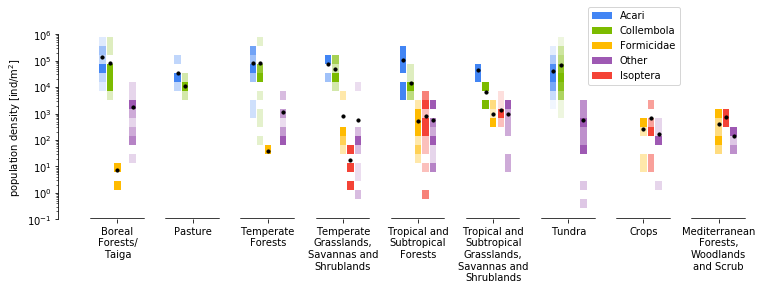

In [52]:
r = soil_site_data.reset_index()
original_biomes = r['aggregated biome'].unique()
# r.repl
print_biomes = ['Boreal\nForests/\nTaiga','Pasture','Temperate\nForests','Temperate\nGrasslands,\nSavannas and\nShrublands','Tropical and\nSubtropical\nForests','Tropical and\nSubtropical\nGrasslands,\nSavannas and\nShrublands','Tundra','Crops','Mediterranean\nForests,\nWoodlands\nand Scrub']
r2 = r.replace(to_replace=original_biomes,value=print_biomes)

r4 = r2.loc[r2['numerical value']>0]
bins = np.logspace(np.log10(r4['numerical value'].min()),np.log10(r4['numerical value'].max()),20)
t = r4.groupby(['aggregated biome','aggregated taxon'])['numerical value'].apply(lambda x: pd.cut(x,bins=bins).value_counts()/len(x)).reset_index()
y = t.groupby(['aggregated biome','aggregated taxon'])['numerical value'].apply(np.max).reset_index()
t3 = t.merge(y,left_on=['aggregated biome','aggregated taxon'],right_on=['aggregated biome','aggregated taxon'])
t3['val'] = t3['numerical value_x']/t3['numerical value_y']


fig,ax=plt.subplots(figsize=[11,4])
def print_data(x):
    col_map = pd.Series(['#4285F4','#7CBB00','#FFBB00','#f44336','#9e59b3'],index=['Acari','Collembola','Formicidae','Isoptera','Other'])
    fine_loc = pd.Series([-0.4,-0.2,0,0.2,0.4],index=['Acari','Collembola','Formicidae','Isoptera','Other'])
    col = col_map.loc[x['aggregated taxon'].values[0]]
    locs = pd.Series(range(0,2*len(r4['aggregated biome'].unique()),2),index=r4['aggregated biome'].unique())
    xloc = locs.loc[x['aggregated biome'].values[0]] + fine_loc.loc[x['aggregated taxon'].values[0]]
    if x['val'].values[0] == 1:
        lab = x['aggregated taxon'].values[0]
    else:
        lab=None
    plt.bar(x=xloc,
            height=x['level_2'].values[0].right-x['level_2'].values[0].left,
            width=0.17,
            bottom=x['level_2'].values[0].left,
            log=True,color=col,alpha=x['val'].values[0],
            label=lab
           )
#     if x['val'].values[0] >0:
#         plt.plot([xloc-0.17/2,xloc+0.17/2],[x['level_2'].values[0].right,x['level_2'].values[0].right],color='k',linewidth=0.3,alpha=1)

def print_mean_median(x):
    col_map = pd.Series(['#4285F4','#7CBB00','#FFBB00','#f44336','#9e59b3'],index=['Acari','Collembola','Formicidae','Isoptera','Other'])
    fine_loc = pd.Series([-0.4,-0.2,0,0.2,0.4],index=['Acari','Collembola','Formicidae','Isoptera','Other'])
    col = col_map.loc[x['aggregated taxon'].values[0]]
    locs = pd.Series(range(0,2*len(r4['aggregated biome'].unique()),2),index=r4['aggregated biome'].unique())
    xloc = locs.loc[x['aggregated biome'].values[0]] + fine_loc.loc[x['aggregated taxon'].values[0]]
    plt.scatter(x=xloc,y=x['numerical value'].mean(),marker='.',c='k',s=40,zorder=3)


for i in range(0,2*len(r4['aggregated biome'].unique()),2):    
    plt.plot([i-0.7,i+0.7],[1e-1,1e-1],'k')
ax = t3.groupby(['aggregated biome','aggregated taxon','level_2']).apply(print_data)
ax = plt.gca()
ax.set_xticks(range(0,2*len(r4['aggregated biome'].unique()),2))
ax.set_xticklabels(r4['aggregated biome'].unique())

ax.get_label()
ax.set_ylim([1e-1,1e6])
ax.set_ylabel('population density [ind/m$^2$]')
# plt.legend()
legend_without_duplicate_labels(ax,(0.8,0.7))
sb.despine(top=True, bottom=True, right=True)
r4.groupby(['aggregated biome','aggregated taxon']).apply(print_mean_median)
plt.tight_layout()
plt.savefig('results/fig4_test.svg',dpi=300)
plt.savefig('results/fig4_test.png',dpi=300)

In [49]:
soil_site_data.loc[('Acari','Boreal Forests/Taiga')]

site
C01 – N. Finland – Kevo – pine forest                                    147409.16210
C46 – USA – Oregon – Andrews Experimental Forest – Pseudotsuga forest     72427.34297
C48 – Japan – Shiga-Yama – subalpine conifer forest                       33189.92681
C49 – Australia – Mt. Kosciusco – dry Eucalyptus forest                   62990.41142
C50 – Australia – Mt. Kosciusco – wet Eucalyptus forest                   64234.85943
Fell Riisitunturi                                                        133698.00000
Hornsund, Spitsbergen-plot 1- open ground                                  9848.00000
Hornsund, Spitsbergen-plot 1- under plant associations                    34152.00000
Hornsund, Spitsbergen-plot 2                                              21991.00000
Hornsund, Spitsbergen-plot 3                                              42984.00000
Hornsund, Spitsbergen-plot 4-  in the moss\nand turf layers               60507.00000
Ivantjarnsheden, Jadraas, Gastrikland            

In [33]:
soil_biome_means_print

aggregated biome Boreal Forests/Taiga        Crops     \
level_0                          mean   N     mean  N   
aggregated taxon                                        
Acari                    142427±45402  15        0  0   
Collembola                84717±40275  15        0  0   
Formicidae                        8±5   2   271±96  6   
Isoptera                            0   0  680±498  6   
Other                        1615±616  16   170±67  7   

aggregated biome Mediterranean Forests, Woodlands and Scrub     Pasture     \
level_0                                                mean  N     mean  N   
aggregated taxon                                                             
Acari                                           34147±17772  5        0  0   
Collembola                                       10868±2431  5        0  0   
Formicidae                                                0  0  407±156  7   
Isoptera                                                  0  0   726±97  6   
Other                                                     0  0   143±40  6   

aggregated biome Temperate Forests      \
level_0                       mean   N   
aggregated taxon                         
Acari                  79822±19622  13   
Collembola             79523±54159  14   
Formicidae                  38±nan   1   
Isoptera                         0   0   
Other                     1104±531  14   

aggregated biome Temperate Grasslands, Savannas and Shrublands      \
level_0                                                   mean   N   
aggregated taxon                                                     
Acari                                              75070±25104   3   
Collembola                                         47060±15420   7   
Formicidae                                             826±674   7   
Isoptera                                                 18±14   3   
Other                                                  590±509  14   

aggregated biome Tropical and Subtropical Forests      \
level_0                                      mean   N   
aggregated taxon                                        
Acari                                104555±62783   5   
Collembola                             14383±4035   8   
Formicidae                                512±159  14   
Isoptera                                  829±270  18   
Other                                     574±186  18   

aggregated biome Tropical and Subtropical Grasslands, Savannas and Shrublands  \
level_0                                                                  mean   
aggregated taxon                                                                
Acari                                                   45854±16019             
Collembola                                                6625±4831             
Formicidae                                                  952±210             
Isoptera                                                   1322±341             
Other                                                       928±395             

aggregated biome           Tundra      
level_0            N         mean   N  
aggregated taxon                       
Acari              2   39966±5883  50  
Collembola         2  66061±20363  37  
Formicidae         7            0   0  
Isoptera          10            0   0  
Other              7      552±186  16

In [34]:
soil_biome_means.sum().apply(print_u)

aggregated biome                                              level_0
Boreal Forests/Taiga                                          mean       228767+/-60694
                                                              N                      48
Crops                                                         mean           1122+/-511
                                                              N                      19
Mediterranean Forests, Woodlands and Scrub                    mean        45016+/-17937
                                                              N                      10
Pasture                                                       mean           1277+/-188
                                                              N                      19
Temperate Forests                                             mean         160487+/-nan
                                                              N                      42
Temperate Grasslands, Savannas and Shrublands     

In [36]:
#t= soil_site_data.reset_index().pivot_table(index='aggregated taxon',columns='aggregated biome',values='norm value', aggfunc='median').T.reset_index()
t= soil_site_data.groupby(['aggregated taxon','aggregated biome']).median().reset_index().merge(pd.DataFrame(biome_area1),left_on='aggregated biome',right_index=True)
t.loc[:,'Total'] = (t.loc[:,'numerical value']*t.loc[:,'area']).values
(t.pivot_table(values='Total',index='aggregated taxon',columns='aggregated biome',aggfunc=np.nansum)/1e18).sum(axis=1)


NameError: name 'biome_area1' is not defined

In [11]:
soil_biome_means_unp = soil_site_data.groupby(['aggregated taxon','aggregated biome']).apply(lambda x: unp.uarray(nominal_values= x.mean(),std_devs=x.sem()))
soil_biome_means_unp = soil_biome_means_unp.reset_index()
biome_area = pd.read_csv('data/aggregated biomes data.csv')
biome_area1 = biome_area.groupby('aggregated biome 1')['area'].sum()
biome_area2 = biome_area.groupby('aggregated biome 2')['area'].sum()
# .pivot_table(columns='aggregated taxon',index='aggregated biome')
soil_biome_means_unp1 = soil_biome_means_unp.merge(pd.DataFrame(biome_area1),left_on='aggregated biome',right_index=True)
soil_biome_means_unp2 = soil_biome_means_unp[soil_biome_means_unp['aggregated taxon'].isin(['Formicidae','Isoptera'])]
soil_biome_means_unp2.loc[soil_biome_means_unp2.loc[:,'aggregated biome'].str.contains('Forest'),'aggregated biome'] = 'Forests'
soil_biome_means_unp2.loc[soil_biome_means_unp2.loc[:,'aggregated biome'].str.contains('Grass'),'aggregated biome'] = 'Shrubland/Grassland'
soil_biome_means_unp2 = soil_biome_means_unp2.merge(pd.DataFrame(biome_area2),left_on='aggregated biome',right_index=True)
part1 = soil_biome_means_unp1[soil_biome_means_unp1['aggregated taxon'].isin(['Acari','Collembola','Formicidae','Isoptera','Other'])]
part2 = soil_biome_means_unp2[soil_biome_means_unp2['aggregated taxon'].isin(['Formicidae','Isoptera'])]

/home/yinonbaron/.local/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sy

In [12]:
part1.loc[:,'Total'] = (part1.loc[:,'numerical value']*part1.loc[:,'area']).values
part1.pivot_table(values='Total',index='aggregated taxon',columns='aggregated biome',aggfunc=np.nansum)/1e18

aggregated biome,Boreal Forests/Taiga,Crops,Pasture,Temperate Forests,"Temperate Grasslands, Savannas and Shrublands",Tropical and Subtropical Forests,"Tropical and Subtropical Grasslands, Savannas and Shrublands",Tundra
aggregated taxon,,,,,,,,
Acari,2.2+/-0.7,NaN,NaN,0.86+/-0.21,0.41+/-0.14,1.8+/-1.1,0.48+/-0.17,0.30+/-0.04
Collembola,1.3+/-0.6,NaN,NaN,0.9+/-0.6,0.26+/-0.08,0.25+/-0.07,0.07+/-0.05,0.49+/-0.15
Formicidae,0.00012+/-0.00008,0.0041+/-0.0015,0.011+/-0.004,0.00040888+/-nan,0.004+/-0.004,0.0090+/-0.0028,0.0099+/-0.0022,NaN
Isoptera,NaN,0.010+/-0.008,0.0201+/-0.0027,NaN,0.00010+/-0.00007,0.015+/-0.005,0.014+/-0.004,NaN
Other,0.025+/-0.010,0.0026+/-0.0010,0.0040+/-0.0011,0.012+/-0.006,0.0032+/-0.0028,0.0101+/-0.0033,0.010+/-0.004,0.0041+/-0.0014


In [40]:
(part1.groupby('aggregated taxon').Total.sum()/1e18)

aggregated taxon
Acari                         6.1+/-1.4
Collembola                    3.3+/-0.9
Formicidae    0.03930902321422231+/-nan
Isoptera                  0.059+/-0.010
Other                     0.071+/-0.013
Name: Total, dtype: object

In [13]:
# total_soil = (part1.groupby('aggregated taxon').Total.sum()/1e18).sum()
non_na = ~(part1['Total'].apply(lambda x: x.std_dev).isna())
total_soil =  (part1.loc[non_na,'Total'].sum()+part1.loc[~non_na,'Total'].apply(lambda x: x.nominal_value).sum())/1e18

total_soil

9.55139921607545+/-1.6141595527107375

aggregated taxon
Acari         6.123521
Collembola    3.258709
Formicidae    0.039309
Isoptera      0.058930
Other         0.070930
Name: Total, dtype: float64

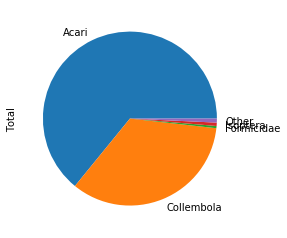

In [58]:
((part1.groupby('aggregated taxon').Total.sum()/1e18).apply(lambda x: x.nominal_value)/total_soil.nominal_value).plot.pie()
(part1.groupby('aggregated taxon').Total.sum()/1e18).apply(lambda x: x.nominal_value)

In [385]:
part2 = part2[part2['aggregated biome']!='Tundra']
part2.loc[:,'Total'] = (part2.loc[:,'norm value']*part2.loc[:,'area']).values
part2.pivot_table(values='Total',index='aggregated taxon',columns='aggregated biome',aggfunc=sum)/1e18

aggregated biome,Forests,Shrubland/Grassland
aggregated taxon,,
Formicidae,0.0050+/-0.0012,0.031+/-0.007
Isoptera,0.1875468772814954+/-nan,0.10+/-0.04


In [386]:
part2.groupby('aggregated taxon').Total.sum()/1e18

aggregated taxon
Formicidae                0.036+/-0.007
Isoptera      0.28914764157651207+/-nan
Name: Total, dtype: object

In [117]:
total_soil = (part1.Total.sum()+part2.Total.sum())/1e18

In [14]:
canopy_biome_mean = canopy_data.groupby(['aggregated biome','site'])['numerical value'].sum().groupby('aggregated biome').agg(['mean','sem'])
canopy_biome_mean = canopy_biome_mean.merge(pd.DataFrame(biome_area1),left_index=True,right_index=True)
canopy_biome_mean['unp']=unp.uarray(nominal_values=canopy_biome_mean['mean'],std_devs=canopy_biome_mean['sem'])
canopy_biome_mean['Total'] = canopy_biome_mean.unp*canopy_biome_mean.area
canopy_biome_mean.Total/1e18

Boreal Forests/Taiga                                                  0.104+/-0.030
Temperate Forests                                                   0.0010+/-0.0004
Tropical and Subtropical Forests                                      0.009+/-0.005
Tropical and Subtropical Grasslands, Savannas and Shrublands    0.000102+/-0.000023
Name: Total, dtype: object

In [20]:
total_canopy = canopy_biome_mean.Total.sum()/1e18

In [15]:
surface_site_taxa_mean = surface_data.groupby(['aggregated biome','site','taxon'])['numerical value'].mean().reset_index()
surface_site_data = surface_site_taxa_mean.groupby(['aggregated biome','site'])['numerical value'].sum()
surface_biome_means = surface_site_data.reset_index().pivot_table(index='aggregated biome',values='numerical value', aggfunc=[calc_uval,'count'])

surface_biome_means = surface_biome_means.droplevel(axis=1,level=0)
surface_biome_means.columns = ['mean','N']


def print_u(x):
    if type(x) != uncertainties.core.Variable:
        return '{:.0f}'.format(x )
    else: 
        return '{:.0f}'.format(x.nominal_value)+'±'+'{:.0f}'.format(x.std_dev)

surface_biome_means_print = surface_biome_means.applymap(print_u)
#soil_biome_means_print.to_csv('results/table_1.csv')
surface_biome_means_print

,mean,N
aggregated biome,,
Crops,1211±514,8
Deserts and Xeric Shrublands,34±3,2
Pasture,176±58,6
"Temperate Grasslands, Savannas and Shrublands",1617±1260,5


In [16]:
canopy_site_taxa_mean = canopy_data.groupby(['aggregated biome','site','taxon'])['numerical value'].mean().reset_index()
canopy_site_data = canopy_site_taxa_mean.groupby(['aggregated biome','site'])['numerical value'].sum()
canopy_biome_means = canopy_site_data.reset_index().pivot_table(index='aggregated biome',values='numerical value', aggfunc=[calc_uval,'count'])

canopy_biome_means = canopy_biome_means.droplevel(axis=1,level=0)
canopy_biome_means.columns = ['mean','N']


def print_u(x):
    if type(x) != uncertainties.core.Variable:
        return '{:.0f}'.format(x )
    else: 
        return '{:.0f}'.format(x.nominal_value)+'±'+'{:.0f}'.format(x.std_dev)

canopy_biome_means_print = canopy_biome_means.applymap(print_u)
#soil_biome_means_print.to_csv('results/table_1.csv')
canopy_biome_means_print

,mean,N
aggregated biome,,
Boreal Forests/Taiga,1322±383,6
Temperate Forests,65±16,6
Tropical and Subtropical Forests,458±268,11
"Tropical and Subtropical Grasslands, Savannas and Shrublands",10±2,19


In [17]:
surface_biome_mean = surface_data.groupby(['aggregated biome','site'])['numerical value'].sum().groupby('aggregated biome').agg(['mean','sem'])
surface_biome_mean = surface_biome_mean.merge(pd.DataFrame(biome_area1),left_index=True,right_index=True)
surface_biome_mean['unp']=unp.uarray(nominal_values=surface_biome_mean['mean'],std_devs=surface_biome_mean['sem'])
surface_biome_mean['Total'] = surface_biome_mean.unp*surface_biome_mean.area
surface_biome_mean.Total/1e18

Crops                                                0.037+/-0.016
Deserts and Xeric Shrublands                     0.00068+/-0.00007
Pasture                                            0.0094+/-0.0032
Temperate Grasslands, Savannas and Shrublands        0.023+/-0.021
Name: Total, dtype: object

In [18]:
total_surface = surface_biome_mean.Total.sum()/1e18

In [21]:
total_surface+total_canopy+total_soil

9.735441274517097+/-1.6146670567091892

In [24]:
print(canopy_data.site.nunique())
print(surface_data.site.nunique())

14
18
